In [1]:
# DBSCAN Clustering
# Importing the libraries
import numpy as np
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [3]:
#Applying DBSCAN Algorithm
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

In [4]:
# Fitting the model
db=dbscan.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels=db.labels_

In [5]:
#identifying the points which makes up our core points
from sklearn import metrics
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

In [7]:
#Calculating the number of clusters
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
#print(n_clusters)
print(metrics.silhouette_score(X,labels,metric='euclidean'))

-0.1908319132560097


In [8]:
print(metrics.calinski_harabasz_score(X, labels))

3.14667577875628


{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}


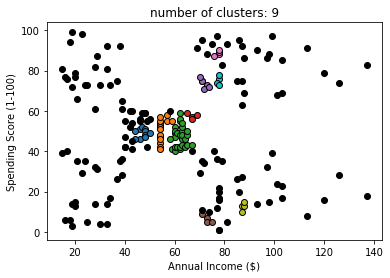

In [8]:
# Plot result
import matplotlib.pyplot as py
  
# Black is used for noise.
unique_labels = set(labels)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red','tab:purple', 'tab:brown', 'tab:pink', 'tab:cyan','tab:olive','k']
print(unique_labels)
for k, col in zip(unique_labels, colors):
    #print(k)
    #print(col)
    if k == -1:
        # Black used for noise.
        col = 'k'
        #print('black')
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    py.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                                      markeredgecolor='k', 
                                      markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    py.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                                      markeredgecolor='k',
                                      markersize=6)
  
py.title('number of clusters: %d' %n_clusters)
py.xlabel('Annual Income ($)')  
py.ylabel('Spending Score (1-100)') 
py.show()